Step 1: Import Required Libraries

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

*Step 2: Load and Preprocess the Data*

In [14]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Reshape the data and normalize the pixel values to be between 0 and 1

# Reshape the dataset to be 2D (samples, features)
X_train = X_train.reshape(-1, 28 * 28).astype('float32')
X_test = X_test.reshape(-1, 28 * 28).astype('float32')

# Normalize the pixel values (0-255) to be between 0 and 1
X_train /= 255.0
X_test /= 255.0
# Convert the labels to one-hot encoded vectors, as this is needed for multi-class classification

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


Step 3: Build the ANN Model

In [15]:
# Initialize the Sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)),  # Input layer with 512 neurons
    tf.keras.layers.Dense(256, activation='relu'),                          # Hidden layer with 256 neurons
    tf.keras.layers.Dense(128, activation='relu'),                          # Hidden layer with 128 neurons
    tf.keras.layers.Dense(10, activation='softmax')                         # Output layer with 10 neurons (one for each digit)
])


Step 4: Compile the Model

In [16]:
# Compile the model with appropriate loss function, optimizer, and metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Step 5: Train the Model

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1968 - accuracy: 0.9395 - val_loss: 0.1166 - val_accuracy: 0.9625
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0876 - accuracy: 0.9732 - val_loss: 0.0881 - val_accuracy: 0.9725
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0617 - accuracy: 0.9810 - val_loss: 0.0921 - val_accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0481 - accuracy: 0.9853 - val_loss: 0.0921 - val_accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0401 - accuracy: 0.9878 - val_loss: 0.0948 - val_accuracy: 0.9755
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0771 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0888 - val_accuracy

Step 6: Evaluate the Model

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0994 - accuracy: 0.9777
Test accuracy: 0.9777


Step 7: Visualize Training History

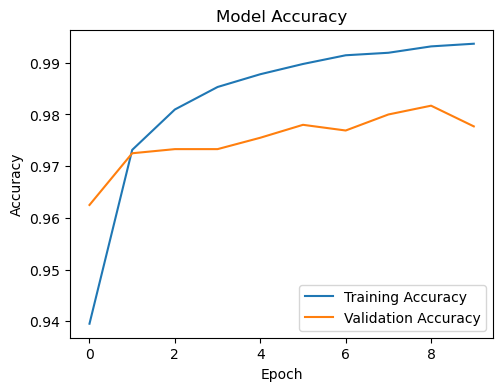

In [19]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')